In [1]:
import pandas as pd

In [20]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
%load_ext nb_black
%matplotlib inline

2022-04-15 20:21:53,248 - blib2to3.pgen2.driver - INFO - Generating grammar tables from /opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/blib2to3/Grammar.txt
2022-04-15 20:21:53,272 - blib2to3.pgen2.driver - INFO - Writing grammar tables to /Users/juanazuero/Library/Caches/black/20.8b1/Grammar3.8.0.final.0.pickle
2022-04-15 20:21:53,272 - blib2to3.pgen2.driver - INFO - Writing failed: [Errno 2] No such file or directory: '/Users/juanazuero/Library/Caches/black/20.8b1/tmp3o97722m'
2022-04-15 20:21:53,273 - blib2to3.pgen2.driver - INFO - Generating grammar tables from /opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/blib2to3/PatternGrammar.txt
2022-04-15 20:21:53,275 - blib2to3.pgen2.driver - INFO - Writing grammar tables to /Users/juanazuero/Library/Caches/black/20.8b1/PatternGrammar3.8.0.final.0.pickle
2022-04-15 20:21:53,276 - blib2to3.pgen2.driver - INFO - Writing failed: [Errno 2] No such file or directory: '/Users/juanazuero/Library/Caches/black/20.8b1/tmp13

<IPython.core.display.Javascript object>

In [3]:
forecast_system = catalog.load("forecast_system")

2022-04-15 20:21:53,363 - kedro.io.data_catalog - INFO - Loading data from `forecast_system` (ParquetDataSet)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
dayly_seasonalities = ["weekday", "saturday", "sunday", "holiday"]
dayly_seasonalities_df = None
for col in dayly_seasonalities:
    aux_df = forecast_system[["ds", col]].iloc[: 180 * 24].copy()
    aux_df["hour"] = aux_df["ds"].apply(lambda x: x.hour)
    aux_df.drop("ds", axis=1, inplace=True)
    aux_df = aux_df[aux_df[col] != 0].copy()
    aux_df[col] = aux_df[col].apply(lambda x: round(x, 5))
    aux_df.drop_duplicates(inplace=True)
    dayly_seasonalities_df = (
        aux_df
        if dayly_seasonalities_df is None
        else pd.merge(dayly_seasonalities_df, aux_df, on="hour")
    )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Weekly seasonality
weekly_seasonality = forecast_system.iloc[: 24 * 14][["ds", "weekly"]].copy()
weekly_seasonality["day"] = weekly_seasonality["ds"].apply(lambda x: x.weekday())
weekly_seasonality["hour"] = weekly_seasonality["ds"].apply(lambda x: x.hour)
weekly_seasonality.drop_duplicates(["day", "hour"], inplace=True)
weekly_seasonality = (
    weekly_seasonality.sort_values(["day", "hour"])
    .drop("ds", axis=1)
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
weekly_seasonality

,weekly,day,hour
0,-0.205686,0,0
1,-0.164996,0,1
2,-0.125007,0,2
3,-0.086002,0,3
4,-0.048249,0,4
...,...,...,...
163,-0.408985,6,19
164,-0.369398,6,20
165,-0.328955,6,21
166,-0.287977,6,22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
yearly_seasonality = forecast_system.iloc[: 24 * 400][["ds", "yearly"]].copy()
yearly_seasonality["day"] = yearly_seasonality["ds"].apply(lambda x: x.day_of_year)
yearly_seasonality["hour"] = yearly_seasonality["ds"].apply(lambda x: x.hour)
yearly_seasonality["yearly"] = yearly_seasonality["yearly"].apply(lambda x: round(x, 5))
yearly_seasonality = (
    yearly_seasonality.drop_duplicates(["day", "hour"])
    .drop("ds", axis=1)
    .sort_values(["day", "hour"])
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

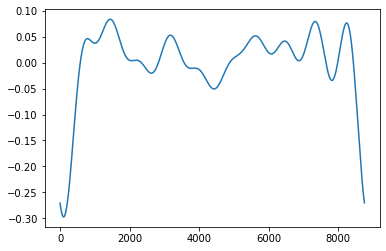

<IPython.core.display.Javascript object>

In [21]:
plt.plot(yearly_seasonality["yearly"])

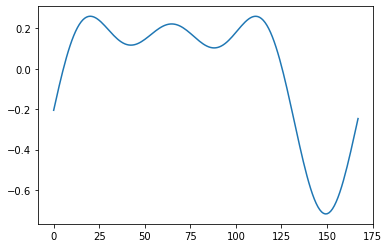

<IPython.core.display.Javascript object>

In [22]:
plt.plot(weekly_seasonality["weekly"])

In [29]:
aux_df["weekday"].iloc[0]

-1.1452372380247133

<IPython.core.display.Javascript object>

In [30]:
aux_df["weekday"].iloc[24]

-1.1452372380276907

<IPython.core.display.Javascript object>

In [22]:
aux_df.sort_values("hour").drop_duplicates()

,weekday,hour
0,-1.145237,0
24,-1.145237,0
48,-1.145237,0
168,-1.145237,0
72,-1.145237,0
...,...,...
22,-0.906789,22
95,-1.146275,23
71,-1.146275,23
23,-1.146275,23


<IPython.core.display.Javascript object>

In [16]:
dayly_seasonalities_df

,weekday,hour,saturday,sunday,holiday
0,-1.145237,0,-1.061852,-0.361182,-0.160130
1,-1.145237,0,-1.061852,-0.361182,-0.160130
2,-1.145237,0,-1.061852,-0.361182,-0.160130
3,-1.145237,0,-1.061852,-0.361182,-0.160130
4,-1.145237,0,-1.061852,-0.361182,-0.160130
...,...,...,...,...,...
103,-0.906789,22,-0.097614,-0.641501,-0.360573
104,-1.146275,23,-0.486308,-0.614962,-0.329175
105,-1.146275,23,-0.486308,-0.614962,-0.329175
106,-1.146275,23,-0.486308,-0.614962,-0.329175


<IPython.core.display.Javascript object>

In [13]:
aux_df

,holiday,hour
144,-0.160130,0
145,-0.084523,1
146,-0.151630,2
147,-0.204358,3
148,-0.143248,4
149,-0.006562,5
150,0.109316,6
151,0.130955,7
152,0.092905,8
153,0.090038,9


<IPython.core.display.Javascript object>